## Code for lab 5, image classification using some image analysis techniques


### Exploratory analysis

In [3]:
from scipy.io import loadmat
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
mnist = loadmat("mnist_data.mat")

In [5]:
print(mnist.keys())
for key, val in mnist.items():
    print(key, val)

dict_keys(['__header__', '__version__', '__globals__', 'x', 'z'])
__header__ b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Fri May  4 15:51:23 2018'
__version__ 1.0
__globals__ []
x [[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. .

In [6]:
images = mnist["x"]
labels = mnist["z"].flatten()
print(images.shape)
print(labels.shape)

(28, 28, 1000)
(1000,)


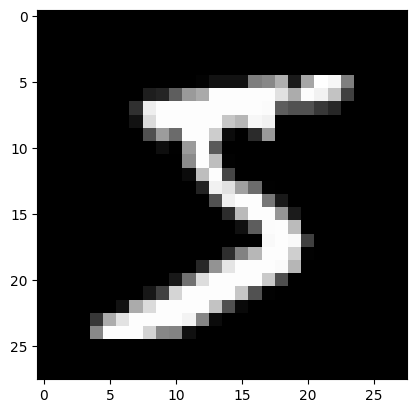

5
Max pixel value:  1.0
Min pixel value:  0.0


In [7]:
plt.imshow(images[:, :, 0], cmap="gray")
plt.show()
print(labels[0])

print("Max pixel value: ", images.max())
print("Min pixel value: ", images.min())
# Is between 0 and 1, so no need to normalize

## Helper function for testing the different sorts of moments

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

def test_moment_features(mf: np.ndarray, labels: np.ndarray, model=LinearDiscriminantAnalysis) -> None:
    mf_train, mf_test, labels_train, labels_test = train_test_split(mf, labels, test_size=0.3) #, random_state=42

    lda = model()
    lda.fit(mf, labels)
    # Resubsitution error is from the predictions on the training set
    mf_predictions = lda.predict(mf)

    # plot confusion matrix
    cm = confusion_matrix(labels, mf_predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
    disp.plot()
    plt.show()

    # Train and test set run
    lda.fit(mf_train, labels_train)
    mf_predictions = lda.predict(mf_test)

    # plot confusion matrix
    cm = confusion_matrix(labels_test, mf_predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
    disp.plot()
    plt.show()
    print("Test accuracy (normal test): ", np.sum(mf_predictions == labels_test) / len(labels_test))

    cv_predictions = cross_val_predict(lda, mf, labels, cv=10)
    cm = confusion_matrix(labels, cv_predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
    disp.plot()
    plt.show()
    print("Test accuracy (10 fold cv): ", np.sum(cv_predictions == labels) / len(labels))

## No image analysis just all the raw features

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

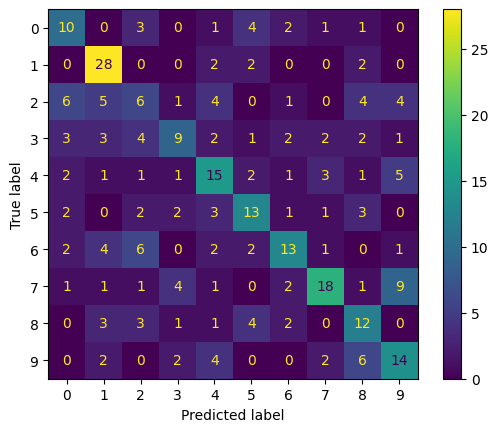

Test accuracy:  0.46


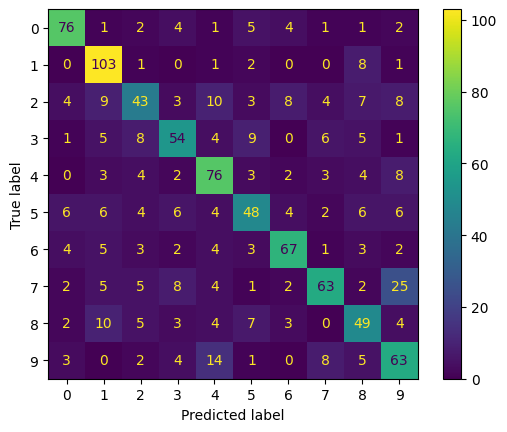

Cross validation accuracy:  0.642


In [10]:
im_x = images.reshape(784, 1000).T
im_x_train, im_x_test, labels_train, labels_test = train_test_split(im_x, labels, test_size=0.3)
lda = LinearDiscriminantAnalysis()
lda.fit(im_x_train, labels_train)
predictions = lda.predict(im_x_test)
cm = confusion_matrix(labels_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot()
plt.show()
print("Test accuracy: ", np.sum(predictions == labels_test) / len(labels_test))

predictions = cross_val_predict(lda, im_x, labels, cv=10)
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot()
plt.show()
print("Cross validation accuracy: ", np.sum(predictions == labels) / len(labels))

## Normal moment features

In [11]:
from moment_features import generate_moments

mf = []
for i in range(images.shape[2]):
    mf.append(generate_moments(images[:, :, i], None, 10, 10))

mf = np.vstack(mf)
print(mf.shape)

(1000, 100)


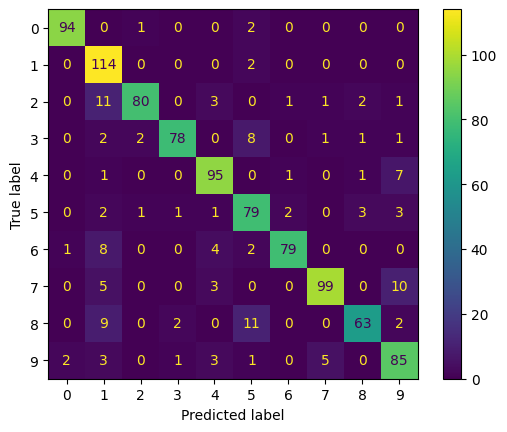

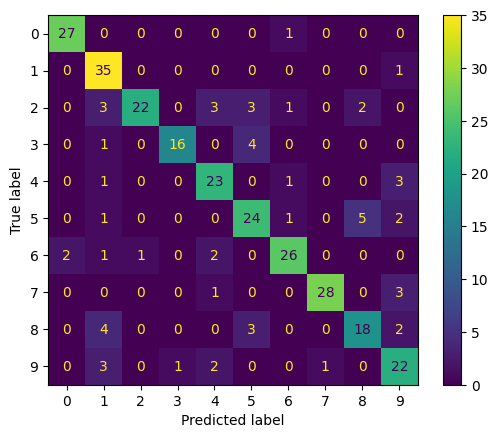

Test accuracy (normal test):  0.8033333333333333


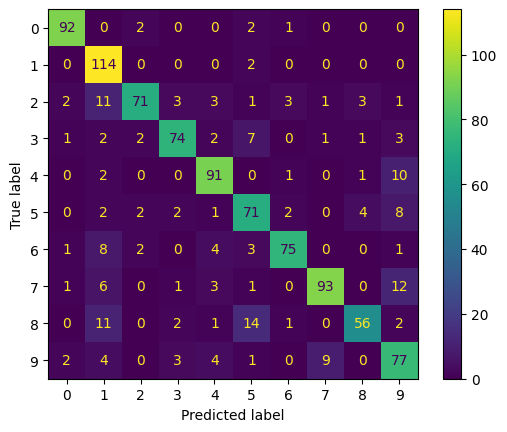

Test accuracy (10 fold cv):  0.814


In [13]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
test_moment_features(mf, labels, LinearDiscriminantAnalysis)

## Central moment features

In [136]:
from moment_features import generate_central_moments

cmf = []
for i in range(images.shape[2]):
    cmf.append(generate_central_moments(images[:, :, i], None, 15, 15))

cmf = np.vstack(cmf)
print(cmf.shape)

(1000, 225)


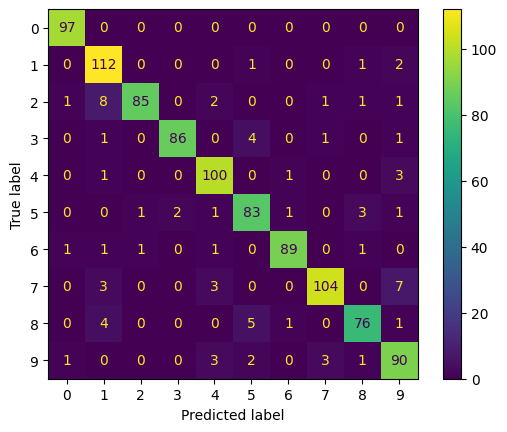

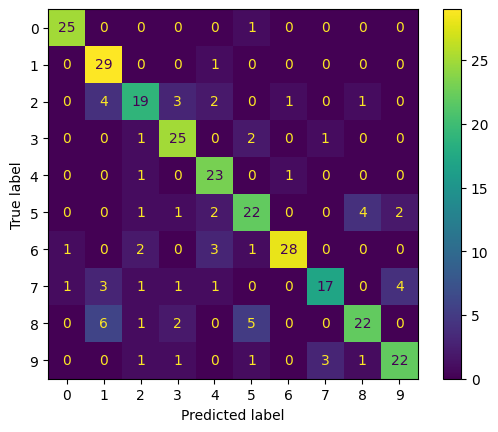

Test accuracy (normal test):  0.7733333333333333


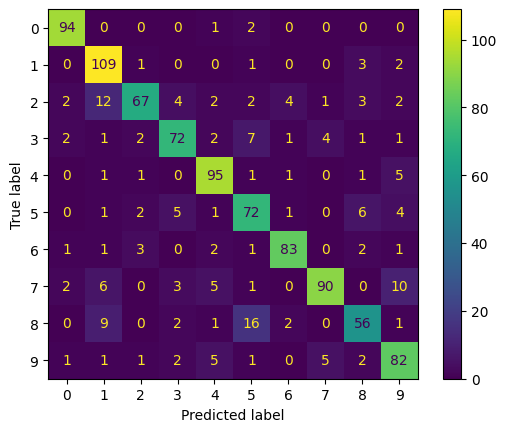

Test accuracy (10 fold cv):  0.82


In [137]:
test_moment_features(cmf, labels)

## Combine and use all the different moment features as features for the classification task

In [48]:
from moment_features import generate_central_moments, generate_hu_moments, generate_scaled_central_moments, generate_moments

n_moments = 10
cmsf = []
for i in range(images.shape[2]):
    cmsf.append(np.hstack([generate_moments(images[:, :, i], None, n_moments, n_moments), generate_central_moments(images[:, :, i], None, n_moments, n_moments), generate_scaled_central_moments(images[:, :, i], None, n_moments, n_moments), generate_hu_moments(images[:, :, i])]))

cmsf = np.vstack(cmsf)
print(cmsf.shape)

(1000, 308)


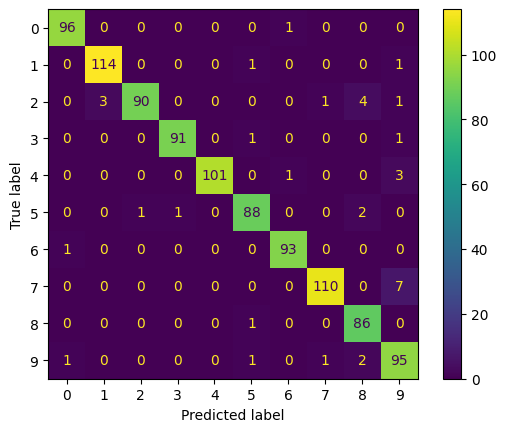

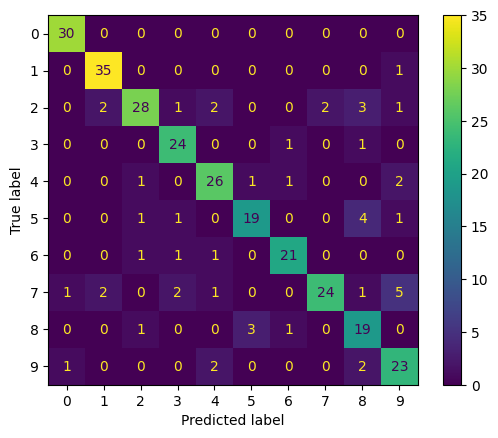

Test accuracy (normal test):  0.83


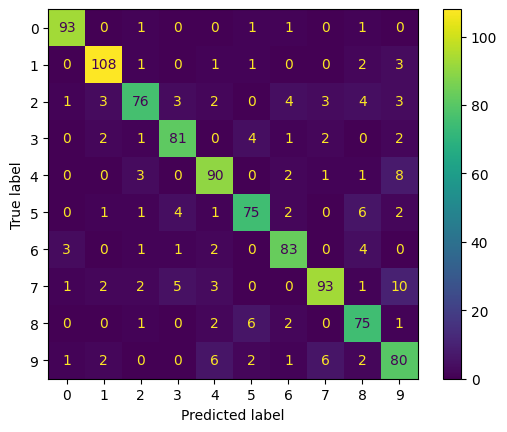

Test accuracy (10 fold cv):  0.854


In [49]:
# import support vector machine for classification
from sklearn.svm import SVC
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier
# import logistic regression
from sklearn.linear_model import LogisticRegression
test_moment_features(cmsf, labels, LinearDiscriminantAnalysis)

## Hu moment features

In [15]:
from moment_features import generate_hu_moments

hu = []
for i in range(images.shape[2]):
    hu.append(generate_hu_moments(images[:, :, i]))

hu = np.vstack(hu)
print(hu.shape)

(1000, 8)


/usr/local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


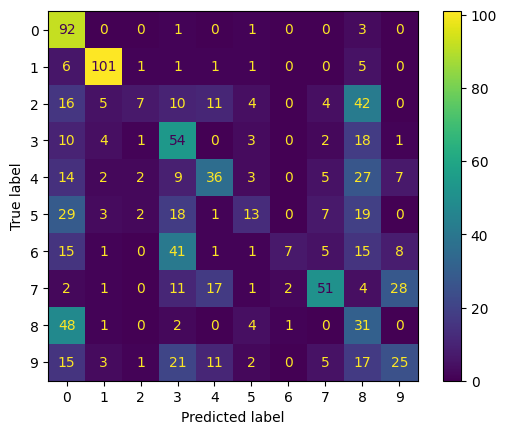

/usr/local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


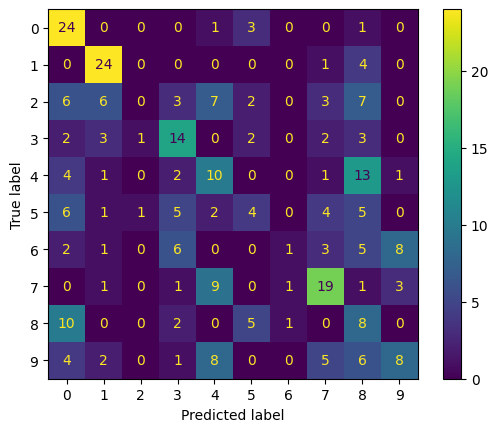

/usr/local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/site-packages/sklearn/disc

Test accuracy (normal test):  0.37333333333333335


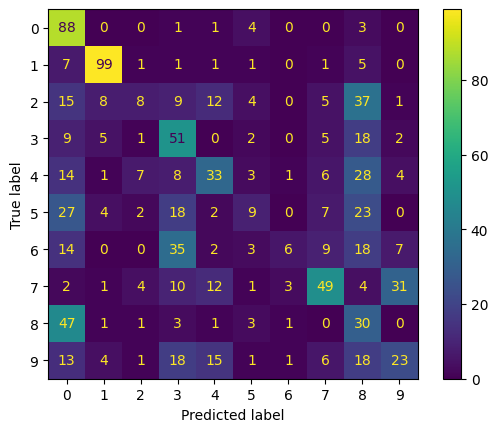

Test accuracy (10 fold cv):  0.396


In [16]:
test_moment_features(hu, labels, model=QuadraticDiscriminantAnalysis)

## Inspect mean and std of the hu moments for different numbers, are they different in some way?

In [139]:

for hu_m in range(8):
    for num in range(10):
        num_dat = hu[labels == num, hu_m]
        print("Mean of hu_moment", hu_m, "for number", num, "is", num_dat.mean(), "and std is", num_dat.std())

Mean of hu_moment 0 for number 0 is 0.4379710803787203 and std is 0.12458653029286733
Mean of hu_moment 0 for number 1 is 0.631142620143917 and std is 0.14293439276625464
Mean of hu_moment 0 for number 2 is 0.46373857248307343 and std is 0.12174624265239
Mean of hu_moment 0 for number 3 is 0.4876527697040146 and std is 0.10445128650384658
Mean of hu_moment 0 for number 4 is 0.4457791450846102 and std is 0.10063786085975392
Mean of hu_moment 0 for number 5 is 0.5287236900552408 and std is 0.12543842823942822
Mean of hu_moment 0 for number 6 is 0.4026569948354269 and std is 0.13108473002876786
Mean of hu_moment 0 for number 7 is 0.5533983249546195 and std is 0.1466243859452004
Mean of hu_moment 0 for number 8 is 0.4327439198472582 and std is 0.10507553547860819
Mean of hu_moment 0 for number 9 is 0.44672327964081626 and std is 0.09801861760471865
Mean of hu_moment 1 for number 0 is 0.03624366266020815 and std is 0.035333800472639454
Mean of hu_moment 1 for number 1 is 0.3761430898514686 

In [138]:
hu.shape

(1000, 8)

## Simple neural network

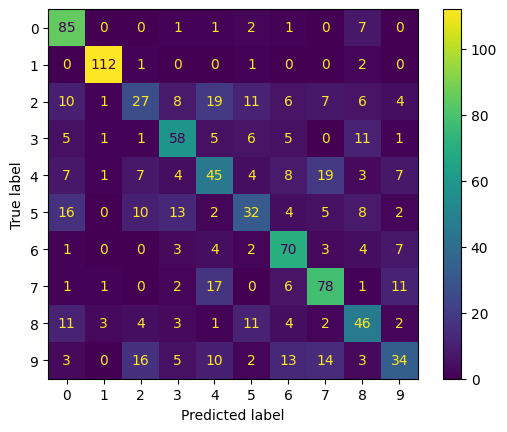

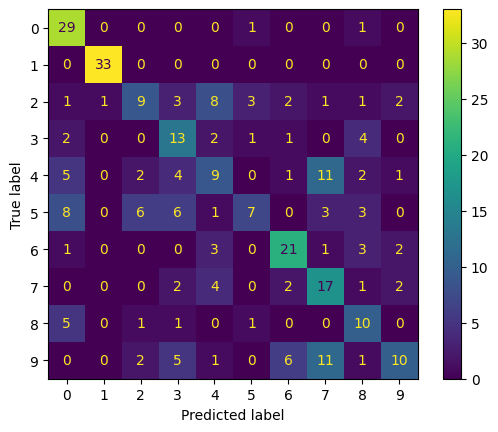

Test accuracy (normal test):  0.5266666666666666


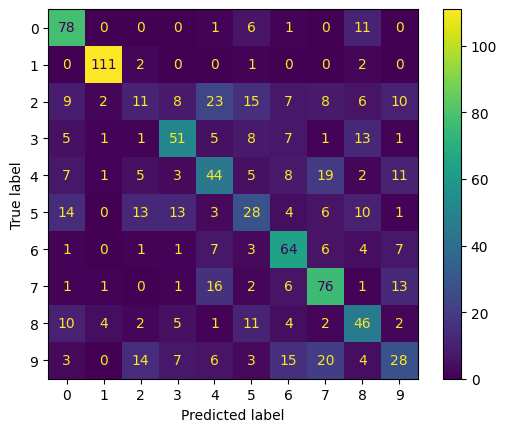

Test accuracy (10 fold cv):  0.537


In [18]:
# import neural network for classification
from sklearn.neural_network import MLPClassifier
test_moment_features(hu, labels, lambda : MLPClassifier(max_iter=10000))